In [111]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

import warnings

warnings.filterwarnings('ignore')

In [72]:
df=pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head(15)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [73]:
df=df.drop(columns='id') #exclude id column beacuse it's not relevant for the prediction
print(df.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [74]:
df.shape

(5110, 11)

In [75]:
df=df.fillna(np.mean(df['bmi']))

In [76]:
df.head(15)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.400000,never smoked,1
7,Female,69.0,0,0,No,Private,Urban,94.39,22.800000,never smoked,1
8,Female,59.0,0,0,Yes,Private,Rural,76.15,28.893237,Unknown,1
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.200000,Unknown,1


In [77]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


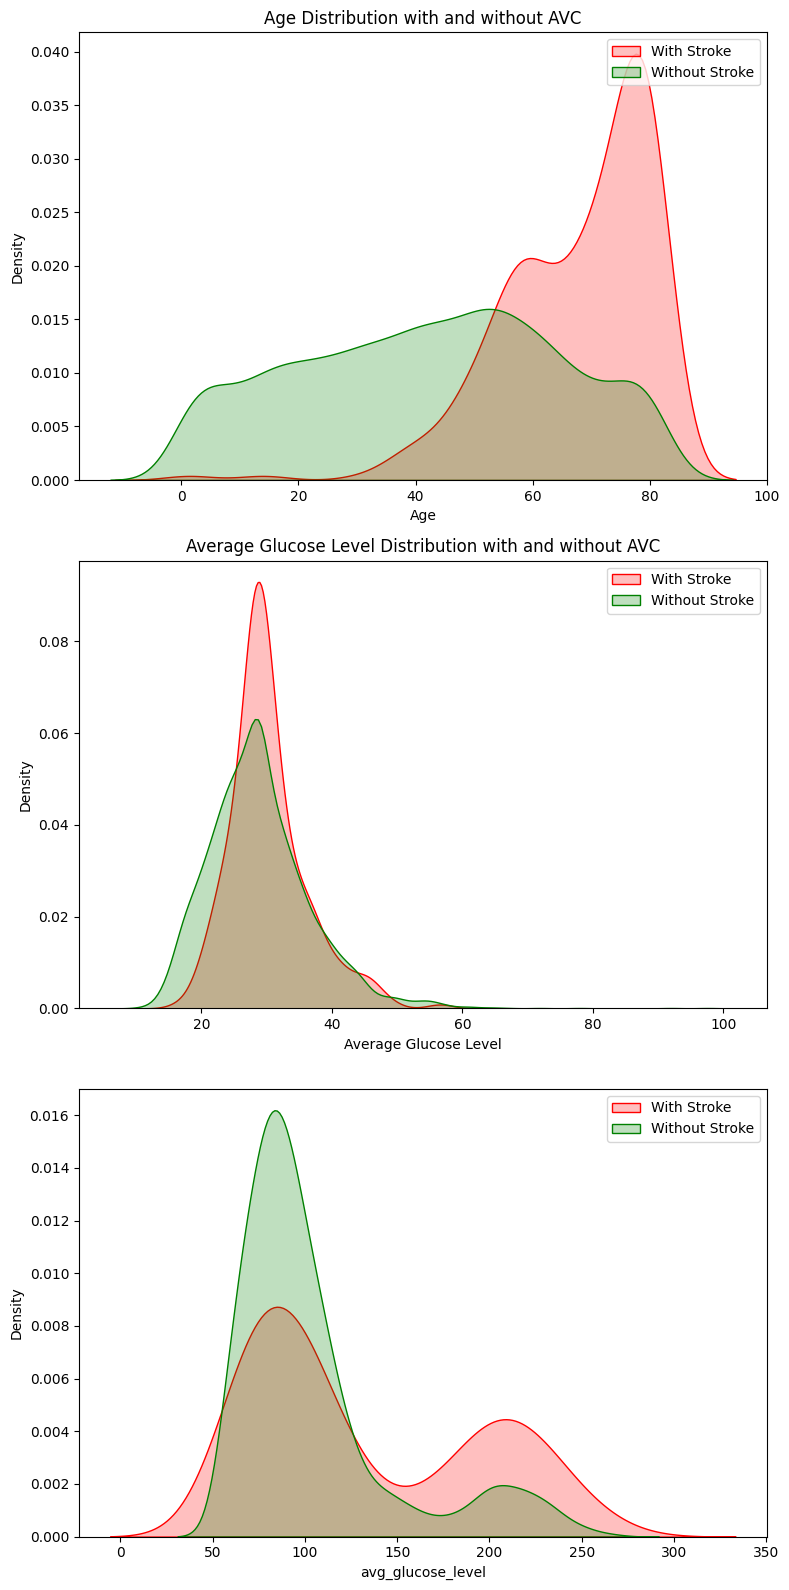

In [78]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(8, 16)) #plt.subplots(2, 1) is to create a grid of subplots with 2 rows and 1 column.

# Plot KDE plot for data with and without stroke
sns.kdeplot(data=df[df['stroke'] == 1]['age'],fill=True,color='red', label='With Stroke',ax=ax1)
sns.kdeplot(data=df[df['stroke'] == 0]['age'],fill=True,color='green', label='Without Stroke',ax=ax1)

ax1.set_xlabel('Age')
ax1.set_ylabel('Density')
ax1.set_title('Age Distribution with and without AVC')

sns.kdeplot(data=df[df['stroke'] == 1]['bmi'],fill=True,color='red', label='With Stroke',ax=ax2)
sns.kdeplot(data=df[df['stroke'] == 0]['bmi'],fill=True,color='green', label='Without Stroke',ax=ax2)

ax2.set_xlabel('BMI')
ax2.set_ylabel('Density')
ax2.set_title('BMI Distribution with and without AVC')

sns.kdeplot(data=df[df['stroke'] == 1]['avg_glucose_level'],fill=True,color='red', label='With Stroke',ax=ax3)
sns.kdeplot(data=df[df['stroke'] == 0]['avg_glucose_level'],fill=True,color='green', label='Without Stroke',ax=ax3)

ax2.set_xlabel('Average Glucose Level')
ax2.set_ylabel('Density')
ax2.set_title('Average Glucose Level Distribution with and without AVC')

ax1.legend()
ax2.legend()
ax3.legend()

plt.tight_layout()
plt.show()

Transform the categorical features to binary and multinomial categorical features

In [79]:
mapping_gender = {
    'Male': 0,
    'Female': 1,
    'Other': 2
}
mapping_ever_married = {
    'Yes': 0,
    'No': 1,
}
mapping_work_type = {
    'Govt_job': 0,
    'children': 1,
    'Never_worked':2,
    'Private':3,
    'Self-employed':4
}
mapping_smoking_status={
    'Unknown':0,
    'formerly smoked':1,
    'never smoked':2,
    'smokes':3
}
mapping_Residence_type={
    'Urban':0,
    'Rural':1
}

df['gender']=df['gender'].map(mapping_gender)
df['ever_married'] = df['ever_married'].map(mapping_ever_married)
df['work_type'] = df['work_type'].map(mapping_work_type)
df['smoking_status'] = df['smoking_status'].map(mapping_smoking_status)
df['Residence_type'] = df['Residence_type'].map(mapping_Residence_type)

<Axes: >

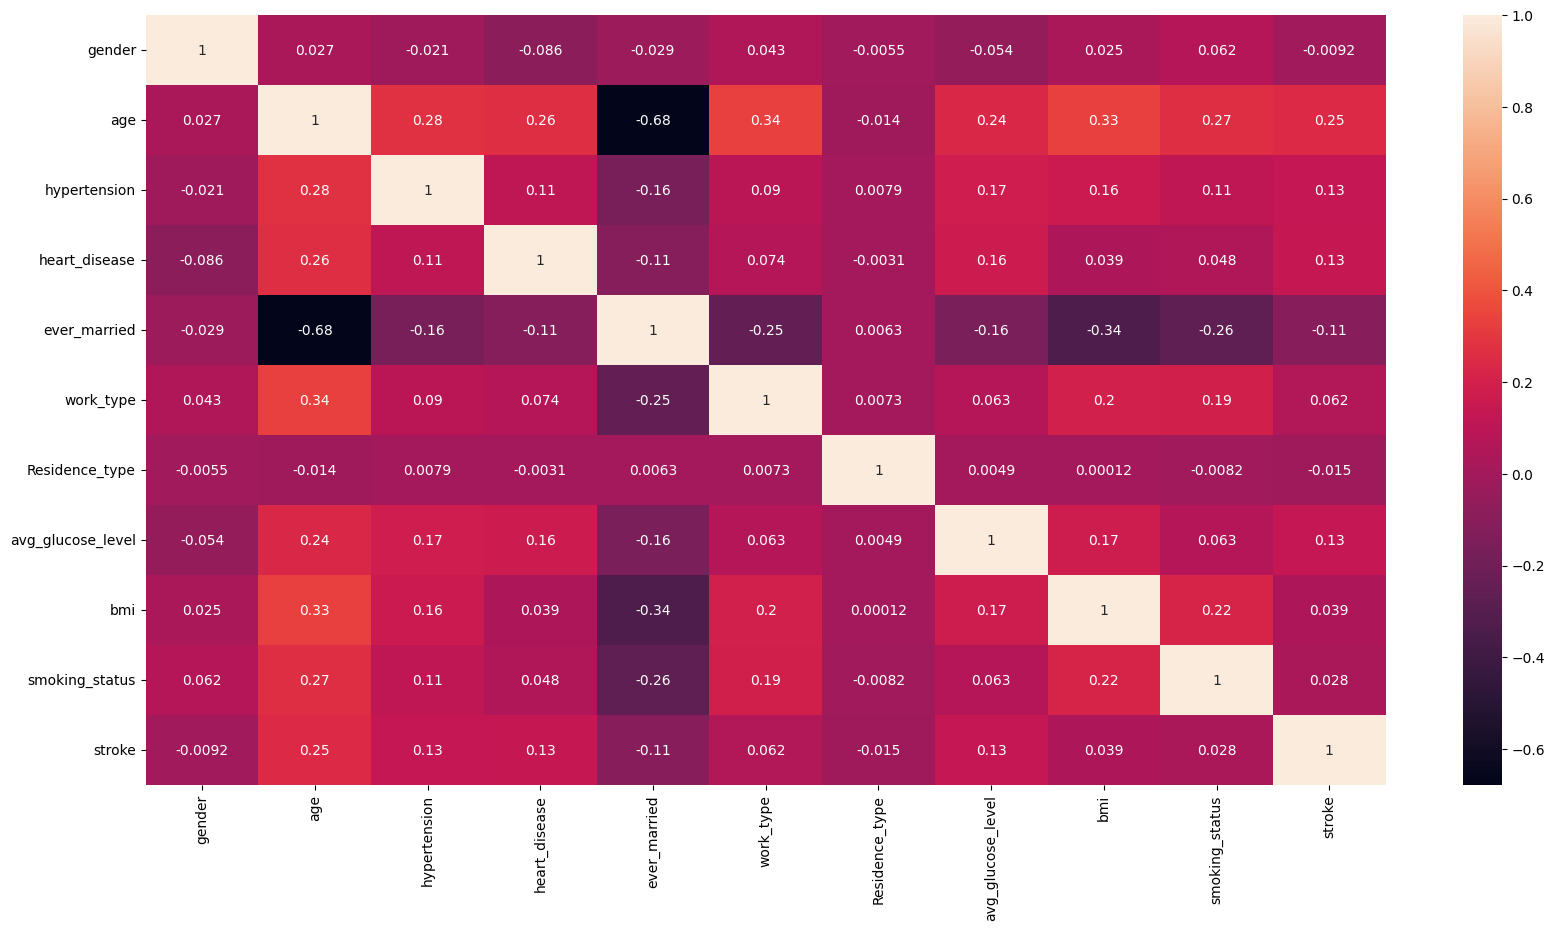

In [80]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

In [81]:
X = df.columns[:-1]
y=df.columns[-1]


In [82]:
msk=np.random.rand(len(df))<0.8
train=df[msk]
test=df[~msk]

In [83]:
X_train=train[['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','smoking_status','bmi']]
y_train=train['stroke']

X_test=test[['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','smoking_status','bmi']]
y_test=test['stroke']

Logistic Regression Model

In [84]:
lr_model=LogisticRegression()
lr_model.fit(X_train,y_train)

LogisticRegression()

In [112]:
y_pred_lr=lr_model.predict(X_test)
print("Prediction on training set:",y_pred)

Prediction on training set: [0 0 0 ... 0 0 0]


In [113]:
print(lr_model.score(X_train,y_train))

0.9502585570056636


In [114]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1001
           1       0.00      0.00      0.00        48

    accuracy                           0.95      1049
   macro avg       0.48      0.50      0.49      1049
weighted avg       0.91      0.95      0.93      1049



KNeighbors Classifier

In [104]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler() #Create an instance  to scale the feature values

In [106]:
X_train_scaled=scaler.fit_transform(X_train)
knn=KNeighborsClassifier(n_neighbors=5) #n_neighbors=5, it is a commonly used value that strikes a balance between capturing local patterns and generalization.
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [116]:
X_test_scaled=scaler.transform(X_test)
y_pred_knn=knn.predict(X_test_scaled)
print("Prediction on training set:",y_pred_knn)

Prediction on training set: [0 0 0 ... 0 0 0]


In [117]:
print(knn.score(X_train_scaled, y_train))

0.9517360256094558


In [118]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1001
           1       0.33      0.04      0.07        48

    accuracy                           0.95      1049
   macro avg       0.64      0.52      0.52      1049
weighted avg       0.93      0.95      0.93      1049



Decision Tree Classifier

In [119]:
from sklearn.tree import DecisionTreeClassifier

In [120]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [121]:
y_pred_dtc=dtc.predict(X_test)
print("Prediction on training set:",y_pred_dtc)

Prediction on training set: [1 0 0 ... 0 0 0]


In [125]:
print(dtc.score(X_train,y_train))

1.0


In [124]:
print(classification_report(y_test,y_pred_dtc))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1001
           1       0.20      0.15      0.17        48

    accuracy                           0.93      1049
   macro avg       0.58      0.56      0.57      1049
weighted avg       0.92      0.93      0.93      1049



In [128]:
import tensorflow as tf
from tensorflow import keras

In [138]:
nn_model=keras.Sequential([
    keras.layers.Dense(64,activation='relu',input_shape=(10,)),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

In [139]:
nn_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [152]:
history=nn_model.fit(X_train,y_train,batch_size=32,epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
127/127 [==============================] - 0s 2ms/step - loss: 0.1856 - accuracy: 0.9503 - val_loss: 0.1528 - val_accuracy: 0.9542
Epoch 2/100
127/127 [==============================] - 0s 2ms/step - loss: 0.1878 - accuracy: 0.9475 - val_loss: 0.1590 - val_accuracy: 0.9542
Epoch 3/100
127/127 [==============================] - 0s 2ms/step - loss: 0.1783 - accuracy: 0.9503 - val_loss: 0.1833 - val_accuracy: 0.9495
Epoch 4/100
127/127 [==============================] - 0s 2ms/step - loss: 0.1893 - accuracy: 0.9483 - val_loss: 0.2043 - val_accuracy: 0.9333
Epoch 5/100
127/127 [==============================] - 0s 2ms/step - loss: 0.1864 - accuracy: 0.9461 - val_loss: 0.1590 - val_accuracy: 0.9542
Epoch 6/100
127/127 [==============================] - 0s 2ms/step - loss: 0.1899 - accuracy: 0.9475 - val_loss: 0.1684 - val_accuracy: 0.9542
Epoch 7/100
127/127 [==============================] - 0s 2ms/step - loss: 0.1962 - accuracy: 0.9453 - val_loss: 0.2607 - val_accuracy: 0.9542

In [153]:
y_pred_nn = nn_model.predict(X_test)


33/33 [==============================] - 0s 1ms/step


In [154]:
test_loss,test_acc=nn_model.evaluate(X_test,y_test)
print("Test loss:",test_loss)
print("Test accuracy:",test_acc)

33/33 [==============================] - 0s 1ms/step - loss: 0.1535 - accuracy: 0.9523
Test loss: 0.15354064106941223
Test accuracy: 0.95233553647995


In [155]:
threshold = 0.5

y_pred_nn_binary = np.where(y_pred_nn >= threshold, 1, 0)

In [156]:
print(classification_report(y_test,y_pred_nn_binary))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1001
           1       0.00      0.00      0.00        48

    accuracy                           0.95      1049
   macro avg       0.48      0.50      0.49      1049
weighted avg       0.91      0.95      0.93      1049



CONCLUSION

Need more data of pations who have had an AVC. 

No AVC patients data biased my machine learning model.